In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [136]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [138]:
df.head(5)

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,New Property,695.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,Moderately New Property,2045.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,3,3,3+,8.0,Moderately New Property,1900.0,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13267.0,3,4,2,19.0,New Property,2525.0,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,2,2,2,8.0,Relatively new property,1250.0,0,0,0,0,0,1,85


In [140]:
df_d = df.copy()

In [142]:
df_d["sector"] = df_d["sector"].replace({'sector 36a' : 'sector 36' , 'sector 10a': 'sector 10', 'sector 99a': 'sector 99', 'sector 37c' : 'sector 37',
                      'sector 88a' : 'sector 88','sector 70a' : 'sector 70', 'sector 82a' : 'sector 82', 'sector 63a': 'sector 63',
                      'sector 67a' : 'sector 67','sector 88b': 'sector 88','sector 9a': 'sector 9','sector 17b' : 'sector 17','sector 17a' : 'sector 17'}) 

In [145]:
latlong = pd.read_csv("latlong.csv")

In [147]:
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [149]:
latlong['latitude'] = latlong["coordinates"].str.split(",").str.get(0).str.split('°').str.get(0).astype('float')
latlong['longitude'] =  latlong["coordinates"].str.split(",").str.get(1).str.split('°').str.get(0).astype('float')

In [151]:
latlong.head(4)

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107


In [153]:
new_df = df_d.merge(latlong,on = "sector")

In [155]:
new_df

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score,coordinates,latitude,longitude
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,New Property,...,0,0,0,0,0,1,0,"28.4172° N, 76.9081° E",28.4172,76.9081
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,Moderately New Property,...,0,0,0,1,0,2,8,"28.3733° N, 76.9729° E",28.3733,76.9729
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,3,3,3+,8.0,Moderately New Property,...,1,0,0,0,0,1,23,"28.3515° N, 76.9428° E",28.3515,76.9428
3,sector 108,flat,sobha city,3.35,13267.0,3,4,2,19.0,New Property,...,0,0,0,0,0,1,102,"28.5134° N, 76.9830° E",28.5134,76.9830
4,sector 108,flat,sobha city,1.90,13758.0,2,2,2,8.0,Relatively new property,...,0,0,0,0,0,1,85,"28.5134° N, 76.9830° E",28.5134,76.9830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,sector 102,flat,emaar gurgaon greens,1.45,8788.0,3,3,2,7.0,Relatively new property,...,1,0,0,0,0,1,169,"28.4750° N, 76.9715° E",28.4750,76.9715
3360,sector 76,flat,suncity avenue 76,0.75,10204.0,2,2,2,11.0,Under Construction,...,0,0,0,0,0,1,57,"28.3935° N, 76.9888° E",28.3935,76.9888
3361,sector 65,flat,m3m golfestate,7.00,18182.0,3,3,2,12.0,Moderately New Property,...,0,0,0,0,1,1,60,"28.4030° N, 77.0690° E",28.4030,77.0690
3362,sector 86,flat,dlf the skycourt,1.60,8294.0,3,3,1,14.0,Relatively new property,...,0,0,0,1,0,1,72,"28.3986° N, 76.9384° E",28.3986,76.9384


In [157]:
df.shape

(3554, 18)

In [159]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4607.903226,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.428571,1908.855714,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.942277,5993.633663,1571.318614,28.4079,76.9153
sector 93,0.848889,8009.777778,1017.000000,28.4153,76.9326


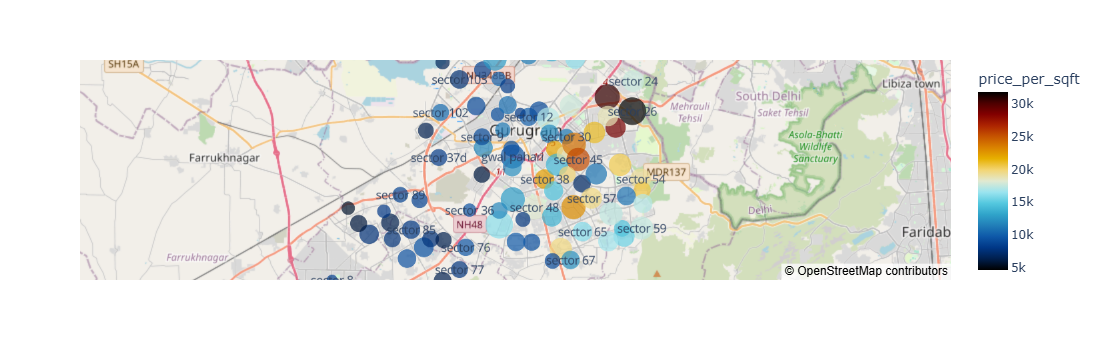

In [161]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

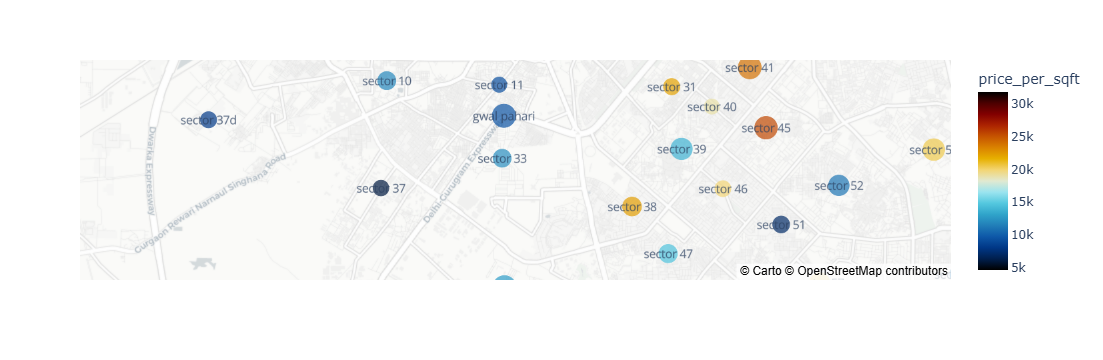

In [163]:
fig1 = px.scatter_mapbox(
    group_df,
    lat="latitude",
    lon="longitude",
    color="price_per_sqft",
    size="built_up_area",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=12,
    mapbox_style="carto-positron",
    text=group_df.index
)
fig1.show()

In [112]:
new_df.to_csv('data_viz1.csv',index=False)

In [165]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [167]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 95A Gurgaon,flat,the roselia 2,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 5...,2,2,2,not available,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",19.0,North,undefined,NaN,Signature roselia 2 bhk. It is a good location...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4.5 out of..."
1,3 BHK Flat in Sector 78 Gurgaon,flat,umang monsoon breeze,1.20,6493.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,pooja room,"Sector 78 Gurgaon, Gurgaon, Haryana",8.0,Na,5 to 10 Year Old,"['Proposed Metro Station', 'Mahapal Shing', 'N...","A 3 bedroom flat, located in sector-78 gurgaon...","['1 Water Purifier', '1 Fridge', '5 Fan', '1 E...","['Piped-gas', 'Natural Light']","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
2,3 BHK Flat in Sector 1 Imt Manesar,flat,hsiidc sidco aravali,0.91,3516.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,servant room,"Sector 1 Imt Manesar, Gurgaon, Haryana",8.0,East,5 to 10 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Arawali sidco good property imt manesar \nNear...,"['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Ch...","['Power Back-up', 'Lift(s)', 'Maintenance Staf...","['Environment5 out of 5', 'Lifestyle4.5 out of..."
3,3 BHK Flat in Sector 108 Gurgaon,flat,sobha city,3.35,13266.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,not available,"Sector 108 Gurgaon, Gurgaon, Haryana",19.0,Na,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vas...",Sobha city gurgaon by sobha ltd.\nOver 86% of ...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4.5 out of..."
4,2 BHK Flat in Sector 108 Gurgaon,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,not available,"N/a, Sector 108 Gurgaon, Gurgaon, Haryana",8.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vas...",Located in the popular residential address of ...,[],"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Lifestyle4.5 out of..."


In [169]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [217]:
wordcloud_df['features']

"['Piped-gas', 'Natural Light']"

In [197]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)


# .apply(ast.literal_eval) --> 
# Applies the function ast.literal_eval to each element in the column.
# Converts the string representation of a list into an actual Python list.

In [199]:
main

['Piped-gas',
 'Natural Light',
 'Power Back-up',
 'Lift(s)',
 'Maintenance Staff',
 'Park',
 'Security Personnel',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Separate entry for servant room',
 'No open drainage around',
 'Swimming Pool',
 'Park',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Mainte

In [201]:
from wordcloud import WordCloud

In [219]:
feature_text = ' '.join(main)

In [229]:
wordcloud_df.to_csv("wordcloud_df.csv")

In [221]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [ ]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_sector_wordcloud(df, sector_name):
    
    # Filter DataFrame for the selected sector
    sector_df = df[df['sector'] == sector_name]
    
    # Flatten features into a list
    main = []
    for item in sector_df['features'].dropna().apply(ast.literal_eval):
        main.extend(item)
    
    # Join list into a single string
    feature_text = ' '.join(main)
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feature_text)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sector_name}', fontsize=16)
    plt.show()


In [223]:
wordcloud_df

,features,sector
0,NaN,sector 95
1,"['Piped-gas', 'Natural Light']",sector 78
2,"['Power Back-up', 'Lift(s)', 'Maintenance Staf...",manesar
3,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 108
4,"['Power Back-up', 'Feng Shui / Vaastu Complian...",sector 108
...,...,...
3549,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 102
3550,"['Centrally Air Conditioned', 'Water purifier'...",sector 76
3551,"['Power Back-up', 'Feng Shui / Vaastu Complian...",sector 65
3552,"['Intercom Facility', 'Lift(s)', 'Park']",sector 86


In [ ]:
import ast
main = []

for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [225]:
new_df.columns

Index(['sector', 'property_type', 'society', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'servant room', 'study room', 'others', 'pooja room',
       'store room', 'furnishing_type', 'luxury_score', 'coordinates',
       'latitude', 'longitude'],
      dtype='object')

In [227]:
wordcloud_df["features"]

0                                                     NaN
1                          ['Piped-gas', 'Natural Light']
2       ['Power Back-up', 'Lift(s)', 'Maintenance Staf...
3       ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
4       ['Power Back-up', 'Feng Shui / Vaastu Complian...
                              ...                        
3549    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
3550    ['Centrally Air Conditioned', 'Water purifier'...
3551    ['Power Back-up', 'Feng Shui / Vaastu Complian...
3552             ['Intercom Facility', 'Lift(s)', 'Park']
3553    ['Power Back-up', 'Feng Shui / Vaastu Complian...
Name: features, Length: 3554, dtype: object